In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prep

In [3]:
sns.set_style("whitegrid")
plt. rcParams['figure.figsize'] = (12, 6)

LABELS = ["admiration", "amusement", "gratitude", "love", "pride", "relief", "remorse"]
TEXT_COL = "text"
DEFAULT_EVAL_PATH = "dev.csv"
DEFAULT_ARTIFACT_DIR = "artifacts"

In [4]:
df = pd.read_csv(DEFAULT_EVAL_PATH)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset Shape: (3149, 8)

Columns: ['text', 'admiration', 'amusement', 'gratitude', 'love', 'pride', 'relief', 'remorse']


,text,admiration,amusement,gratitude,love,pride,relief,remorse
0,Is this in New Orleans?? I really feel like th...,0,0,0,0,0,0,0
1,"You know the answer man, you are programmed to...",0,0,0,0,0,0,0
2,The economy is heavily controlled and subsidiz...,0,0,0,0,0,0,0
3,"Thank you for your vote of confidence, but we ...",0,0,1,0,0,0,0
4,There it is!,0,0,0,0,0,0,0


# EDA

In [5]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total Samples: {len(df)}")
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nText Statistics:")
print(f"  - Average text length: {df[TEXT_COL].str.len().mean():.2f} characters")
print(f"  - Median text length: {df[TEXT_COL].str.len().median():.0f} characters")
print(f"  - Min text length: {df[TEXT_COL].str.len().min()}")
print(f"  - Max text length: {df[TEXT_COL].str.len().max()}")

DATASET OVERVIEW
Total Samples: 3149

Missing Values:
text          0
admiration    0
amusement     0
gratitude     0
love          0
pride         0
relief        0
remorse       0
dtype: int64

Text Statistics:
  - Average text length: 65.79 characters
  - Median text length: 61 characters
  - Min text length: 5
  - Max text length: 174


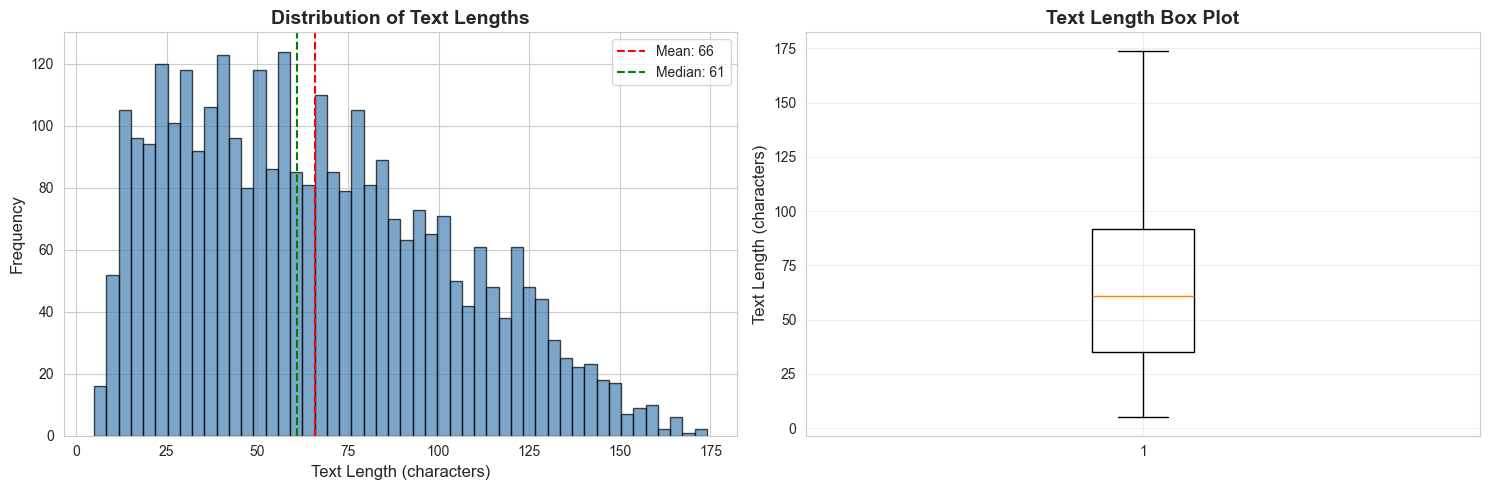

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df[TEXT_COL].str.len(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Text Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Text Lengths', fontsize=14, fontweight='bold')
axes[0].axvline(df[TEXT_COL].str. len().mean(), color='red', linestyle='--', label=f'Mean: {df[TEXT_COL].str.len().mean():.0f}')
axes[0]. axvline(df[TEXT_COL].str.len().median(), color='green', linestyle='--', label=f'Median: {df[TEXT_COL]. str.len().median():.0f}')
axes[0]. legend()

# Box plot
axes[1].boxplot(df[TEXT_COL]. str.len(), vert=True)
axes[1].set_ylabel('Text Length (characters)', fontsize=12)
axes[1]. set_title('Text Length Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
label_counts = df[LABELS].sum(). sort_values(ascending=False)
label_percentages = (df[LABELS].sum() / len(df) * 100).sort_values(ascending=False)

print("\n" + "="*60)
print("LABEL DISTRIBUTION")
print("="*60)
for label in label_counts.index:
    count = label_counts[label]
    pct = label_percentages[label]
    print(f"{label:12s}: {count:4d} samples ({pct:5.2f}%)")


LABEL DISTRIBUTION
admiration  :  488 samples (15.50%)
gratitude   :  358 samples (11.37%)
amusement   :  303 samples ( 9.62%)
love        :  252 samples ( 8.00%)
remorse     :   68 samples ( 2.16%)
relief      :   18 samples ( 0.57%)
pride       :   15 samples ( 0.48%)


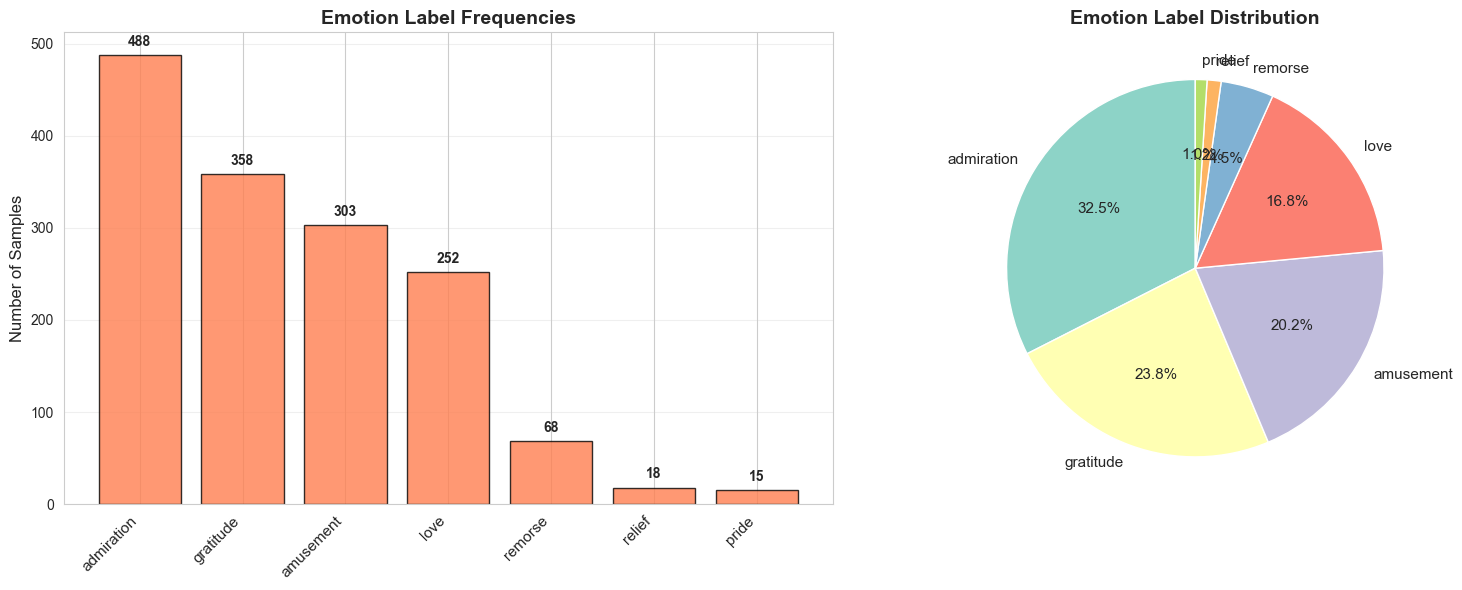

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
axes[0].bar(range(len(label_counts)), label_counts.values, color='coral', edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(label_counts)))
axes[0]. set_xticklabels(label_counts.index, rotation=45, ha='right', fontsize=11)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Emotion Label Frequencies', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=10, fontweight='bold')

# Pie chart
colors = plt.cm.Set3(range(len(label_counts)))
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 11})
axes[1].set_title('Emotion Label Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
labels_per_sample = df[LABELS].sum(axis=1)

print("\n" + "="*60)
print("MULTI-LABEL STATISTICS")
print("="*60)
print(f"Average labels per sample: {labels_per_sample.mean():.3f}")
print(f"Median labels per sample: {labels_per_sample.median():.1f}")
print(f"Min labels per sample: {labels_per_sample.min()}")
print(f"Max labels per sample: {labels_per_sample.max()}")
print(f"\nSamples with no labels: {(labels_per_sample == 0). sum()}")
print(f"Samples with 1 label: {(labels_per_sample == 1).sum()}")
print(f"Samples with 2+ labels: {(labels_per_sample >= 2).sum()}")


MULTI-LABEL STATISTICS
Average labels per sample: 0.477
Median labels per sample: 0.0
Min labels per sample: 0
Max labels per sample: 3

Samples with no labels: 1741
Samples with 1 label: 1315
Samples with 2+ labels: 93


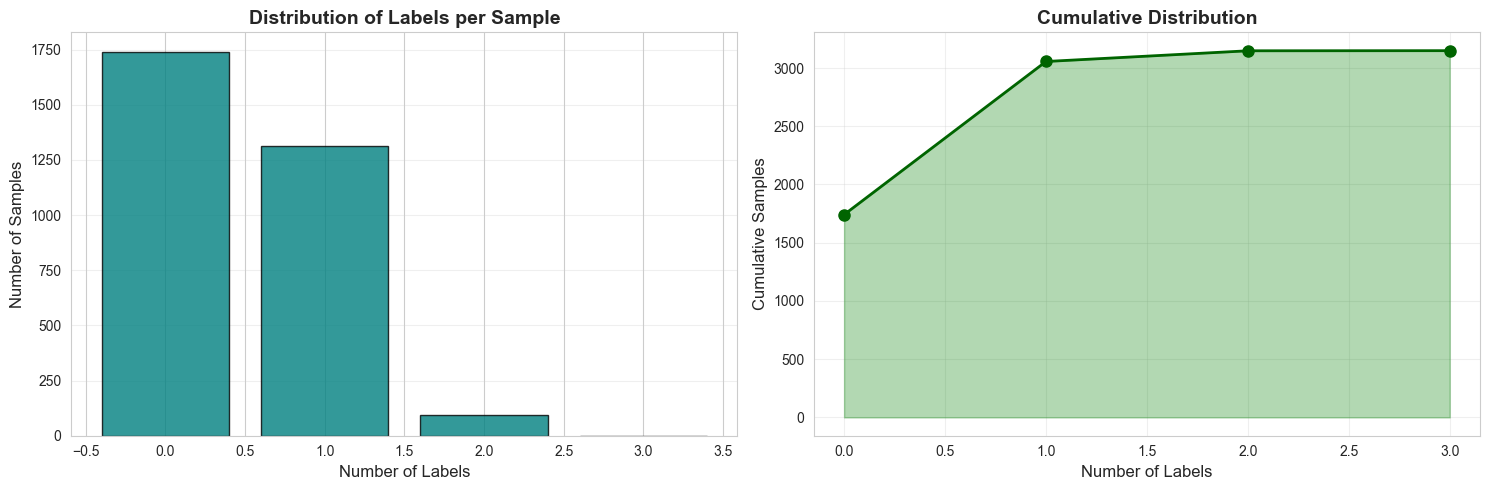

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution
label_dist = labels_per_sample.value_counts().sort_index()
axes[0].bar(label_dist. index, label_dist.values, color='teal', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Number of Labels', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Distribution of Labels per Sample', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative distribution
cumsum = label_dist.cumsum()
axes[1].plot(cumsum.index, cumsum.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].fill_between(cumsum.index, cumsum.values, alpha=0.3, color='green')
axes[1].set_xlabel('Number of Labels', fontsize=12)
axes[1]. set_ylabel('Cumulative Samples', fontsize=12)
axes[1].set_title('Cumulative Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
co_occurrence = np.zeros((len(LABELS), len(LABELS)))

for i, label1 in enumerate(LABELS):
    for j, label2 in enumerate(LABELS):
        co_occurrence[i, j] = ((df[label1] == 1) & (df[label2] == 1)).sum()

# Create DataFrame for better visualization
co_occurrence_df = pd.DataFrame(co_occurrence, index=LABELS, columns=LABELS)

print("\n" + "="*60)
print("LABEL CO-OCCURRENCE MATRIX")
print("="*60)
print(co_occurrence_df. astype(int))


LABEL CO-OCCURRENCE MATRIX
            admiration  amusement  gratitude  love  pride  relief  remorse
admiration         488          6         32    23      0       0        1
amusement            6        303          9     9      0       0        1
gratitude           32          9        358    10      1       1        2
love                23          9         10   252      0       0        0
pride                0          0          1     0     15       0        0
relief               0          0          1     0      0      18        0
remorse              1          1          2     0      0       0       68


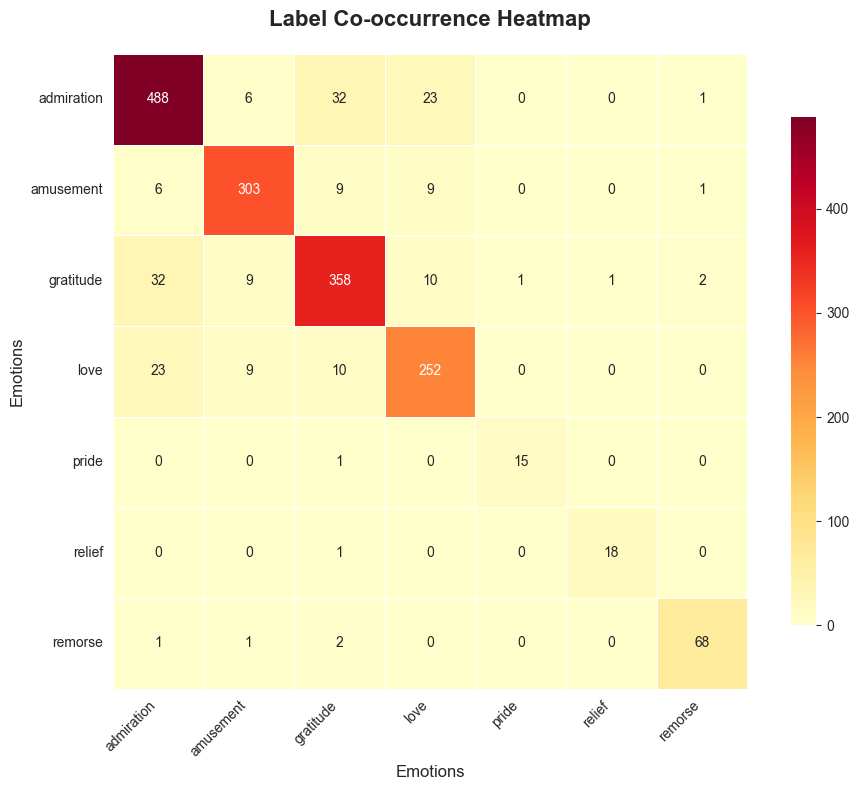

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_df, annot=True, fmt='.0f', cmap='YlOrRd',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Label Co-occurrence Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Emotions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
print("\n" + "="*60)
print("SAMPLE TEXTS BY EMOTION")
print("="*60)

for label in LABELS:
    sample_texts = df[df[label] == 1][TEXT_COL].head(3). tolist()
    print(f"\n{label. upper()}:")
    for i, text in enumerate(sample_texts, 1):
        print(f"  {i}. {text[:100]}..." if len(text) > 100 else f"  {i}. {text}")


SAMPLE TEXTS BY EMOTION

ADMIRATION:
  1. downvoted to hell but i understand your experience. salute, soldier.
  2. Thank you. I really appreciate your response
  3. My favourite moment of the game by my favourite player.

AMUSEMENT:
  1. Lol dream on buddy. You’ve had enough attention today. Actually learn what your talking about helps ...
  2. Your 'brother' had texted alot of girls and ended up on in Internet many times then, what a celebrit...
  3. I am confused. I don't understand how that relates to what I said. Could you explain? Sorry, maybe I...

GRATITUDE:
  1. Thank you for your vote of confidence, but we statistically can't get to 10 wins.
  2. Thank you. I really appreciate your response
  3. Lots of them to mature. Thank you for half baked?

LOVE:
  1. It's better to say a moment like that could truly ignite her love for the game rather than putting a...
  2. Only 5 hour drive..... I guess im doing a day trip to Almonte. I love baked goods.
  3. Where about sis this it’s

# Model

## Load Inference

In [16]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding

class _InferenceDataset(Dataset):
    def __init__(self, tokenizer, texts, max_length):
        self.tokenizer = tokenizer
        self.texts = list(texts)
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding=False,
            max_length=self.max_length,
        )

class EmotionPredictor:
    def __init__(self, artifact_dir=DEFAULT_ARTIFACT_DIR, device=None, batch_size=32):
        self.artifact_dir = artifact_dir
        self.model_dir = os.path.join(self.artifact_dir, "model")

        if not os.path.isdir(self.model_dir):
            raise FileNotFoundError(f"Model directory '{self.model_dir}' not found.")

        self.tokenizer = AutoTokenizer.from_pretrained(self.model_dir)
        self.model = AutoModelForSequenceClassification.from_pretrained(self.model_dir)
        self.thresholds = self._load_thresholds()
        self.max_length = self._read_max_length()
        self.batch_size = batch_size
        self.device = torch.device(device) if device else torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.model.eval()
        self.collator = DataCollatorWithPadding(tokenizer=self.tokenizer)

    def _load_thresholds(self):
        path = os.path.join(self.artifact_dir, "thresholds.json")
        with open(path, "r") as f:
            return json.load(f)

    def _read_max_length(self):
        cfg_path = os.path.join(self.artifact_dir, "config.json")
        if os.path.exists(cfg_path):
            with open(cfg_path, "r") as f:
                cfg = json.load(f)
                return int(cfg. get("max_length", 256))
        return 256

    def _predict_proba(self, texts):
        dataset = _InferenceDataset(self.tokenizer, texts, self.max_length)
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False, collate_fn=self.collator)
        preds = []
        with torch.no_grad():
            for batch in loader:
                batch = {k: v.to(self.device) for k, v in batch.items()}
                logits = self.model(**batch).logits
                probs = torch.sigmoid(logits). cpu().numpy()
                preds.append(probs)
        return np.vstack(preds) if preds else np.zeros((0, len(LABELS)))

    def _binarize(self, probs):
        out = np.zeros_like(probs, dtype=int)
        for idx, label in enumerate(LABELS):
            thr = float(self.thresholds. get(label, 0.5))
            out[:, idx] = (probs[:, idx] >= thr).astype(int)
        return out

    def predict_dataframe(self, texts):
        if len(texts) == 0:
            return pd.DataFrame(columns=LABELS)
        probs = self._predict_proba(texts)
        preds = self._binarize(probs)
        return pd. DataFrame(preds, columns=LABELS)

    def predict_with_probs(self, texts):
        if len(texts) == 0:
            return {"predictions": [], "probabilities": []}
        probs = self._predict_proba(texts)
        preds = self._binarize(probs)
        return probs, preds

## Init Predictor

In [17]:
print("Initializing predictor...")
predictor = EmotionPredictor(artifact_dir=DEFAULT_ARTIFACT_DIR, batch_size=32)
print(f"Model loaded on device: {predictor.device}")

print(f"\nRunning predictions on {len(df)} samples...")
texts = df[TEXT_COL]. values
y_true = df[LABELS].values. astype(int)

# Get predictions and probabilities
y_prob, y_pred = predictor. predict_with_probs(texts)

print("Predictions completed!")
print(f"Predictions shape: {y_pred.shape}")
print(f"Probabilities shape: {y_prob. shape}")

Initializing predictor...
Model loaded on device: cpu

Running predictions on 3149 samples...
Predictions completed!
Predictions shape: (3149, 7)
Probabilities shape: (3149, 7)


## Metrics

In [18]:
from sklearn.metrics import (
    classification_report, f1_score, precision_score, recall_score,
    hamming_loss, jaccard_score, accuracy_score, confusion_matrix
)

# Overall metrics
metrics = {
    'hamming_loss': hamming_loss(y_true, y_pred),
    'jaccard_score': jaccard_score(y_true, y_pred, average='samples'),
    'subset_accuracy': (y_true == y_pred). all(axis=1).mean(),
    'f1_micro': f1_score(y_true, y_pred, average='micro', zero_division=0),
    'f1_macro': f1_score(y_true, y_pred, average='macro', zero_division=0),
    'f1_weighted': f1_score(y_true, y_pred, average='weighted', zero_division=0),
    'precision_micro': precision_score(y_true, y_pred, average='micro', zero_division=0),
    'recall_micro': recall_score(y_true, y_pred, average='micro', zero_division=0),
}

print("\n" + "="*60)
print("BENCHMARK RESULTS")
print("="*60)
print(f"Subset Accuracy (Exact Match): {metrics['subset_accuracy']:.4f}")
print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
print(f"Jaccard Score: {metrics['jaccard_score']:.4f}")
print(f"\nF1 Scores:")
print(f"  Micro: {metrics['f1_micro']:.4f}")
print(f"  Macro: {metrics['f1_macro']:.4f}")
print(f"  Weighted: {metrics['f1_weighted']:.4f}")
print(f"\nPrecision/Recall (Micro):")
print(f"  Precision: {metrics['precision_micro']:.4f}")
print(f"  Recall: {metrics['recall_micro']:.4f}")


BENCHMARK RESULTS
Subset Accuracy (Exact Match): 0.8727
Hamming Loss: 0.0220
Jaccard Score: 0.3797

F1 Scores:
  Micro: 0.8434
  Macro: 0.7538
  Weighted: 0.8430

Precision/Recall (Micro):
  Precision: 0.8205
  Recall: 0.8675


In [19]:
per_label_metrics = {}
for i, label in enumerate(LABELS):
    per_label_metrics[label] = {
        'f1': f1_score(y_true[:, i], y_pred[:, i], zero_division=0),
        'precision': precision_score(y_true[:, i], y_pred[:, i], zero_division=0),
        'recall': recall_score(y_true[:, i], y_pred[:, i], zero_division=0),
        'support': int(y_true[:, i]. sum()),
    }

print("\n" + "="*60)
print("PER-LABEL PERFORMANCE")
print("="*60)
per_label_df = pd.DataFrame(per_label_metrics). T
print(per_label_df.round(3))


PER-LABEL PERFORMANCE
               f1  precision  recall  support
admiration  0.800      0.735   0.877    488.0
amusement   0.849      0.856   0.842    303.0
gratitude   0.925      0.958   0.894    358.0
love        0.839      0.785   0.901    252.0
pride       0.640      0.800   0.533     15.0
relief      0.333      0.667   0.222     18.0
remorse     0.891      0.884   0.897     68.0


# Results

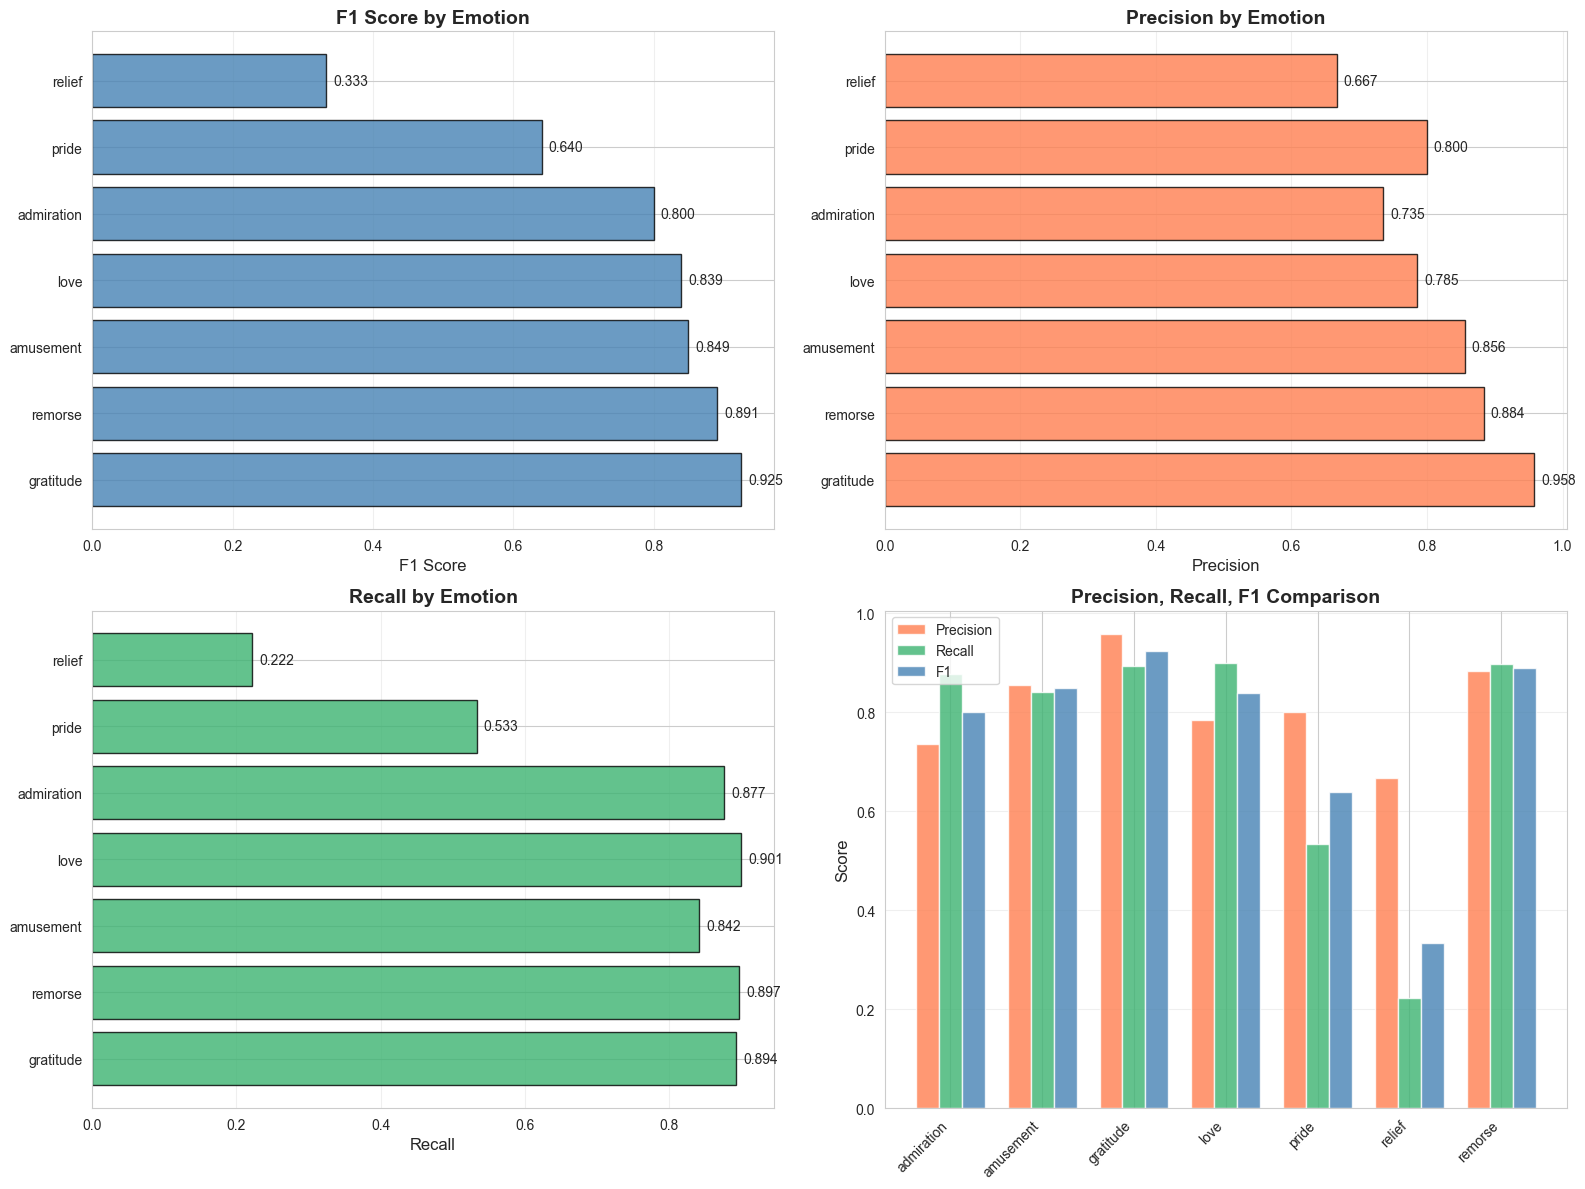

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# F1 Scores
labels_sorted = per_label_df.sort_values('f1', ascending=False). index
f1_scores = per_label_df. loc[labels_sorted, 'f1']. values
axes[0, 0].barh(labels_sorted, f1_scores, color='steelblue', edgecolor='black', alpha=0.8)
axes[0, 0].set_xlabel('F1 Score', fontsize=12)
axes[0, 0].set_title('F1 Score by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(f1_scores):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# Precision
precision_scores = per_label_df.loc[labels_sorted, 'precision'].values
axes[0, 1].barh(labels_sorted, precision_scores, color='coral', edgecolor='black', alpha=0.8)
axes[0, 1].set_xlabel('Precision', fontsize=12)
axes[0, 1].set_title('Precision by Emotion', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(precision_scores):
    axes[0, 1]. text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# Recall
recall_scores = per_label_df.loc[labels_sorted, 'recall'].values
axes[1, 0].barh(labels_sorted, recall_scores, color='mediumseagreen', edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_title('Recall by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(recall_scores):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# Combined comparison
x = np.arange(len(LABELS))
width = 0.25
axes[1, 1].bar(x - width, per_label_df['precision'], width, label='Precision', color='coral', alpha=0.8)
axes[1, 1].bar(x, per_label_df['recall'], width, label='Recall', color='mediumseagreen', alpha=0.8)
axes[1, 1].bar(x + width, per_label_df['f1'], width, label='F1', color='steelblue', alpha=0.8)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(LABELS, rotation=45, ha='right')
axes[1, 1]. set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Precision, Recall, F1 Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

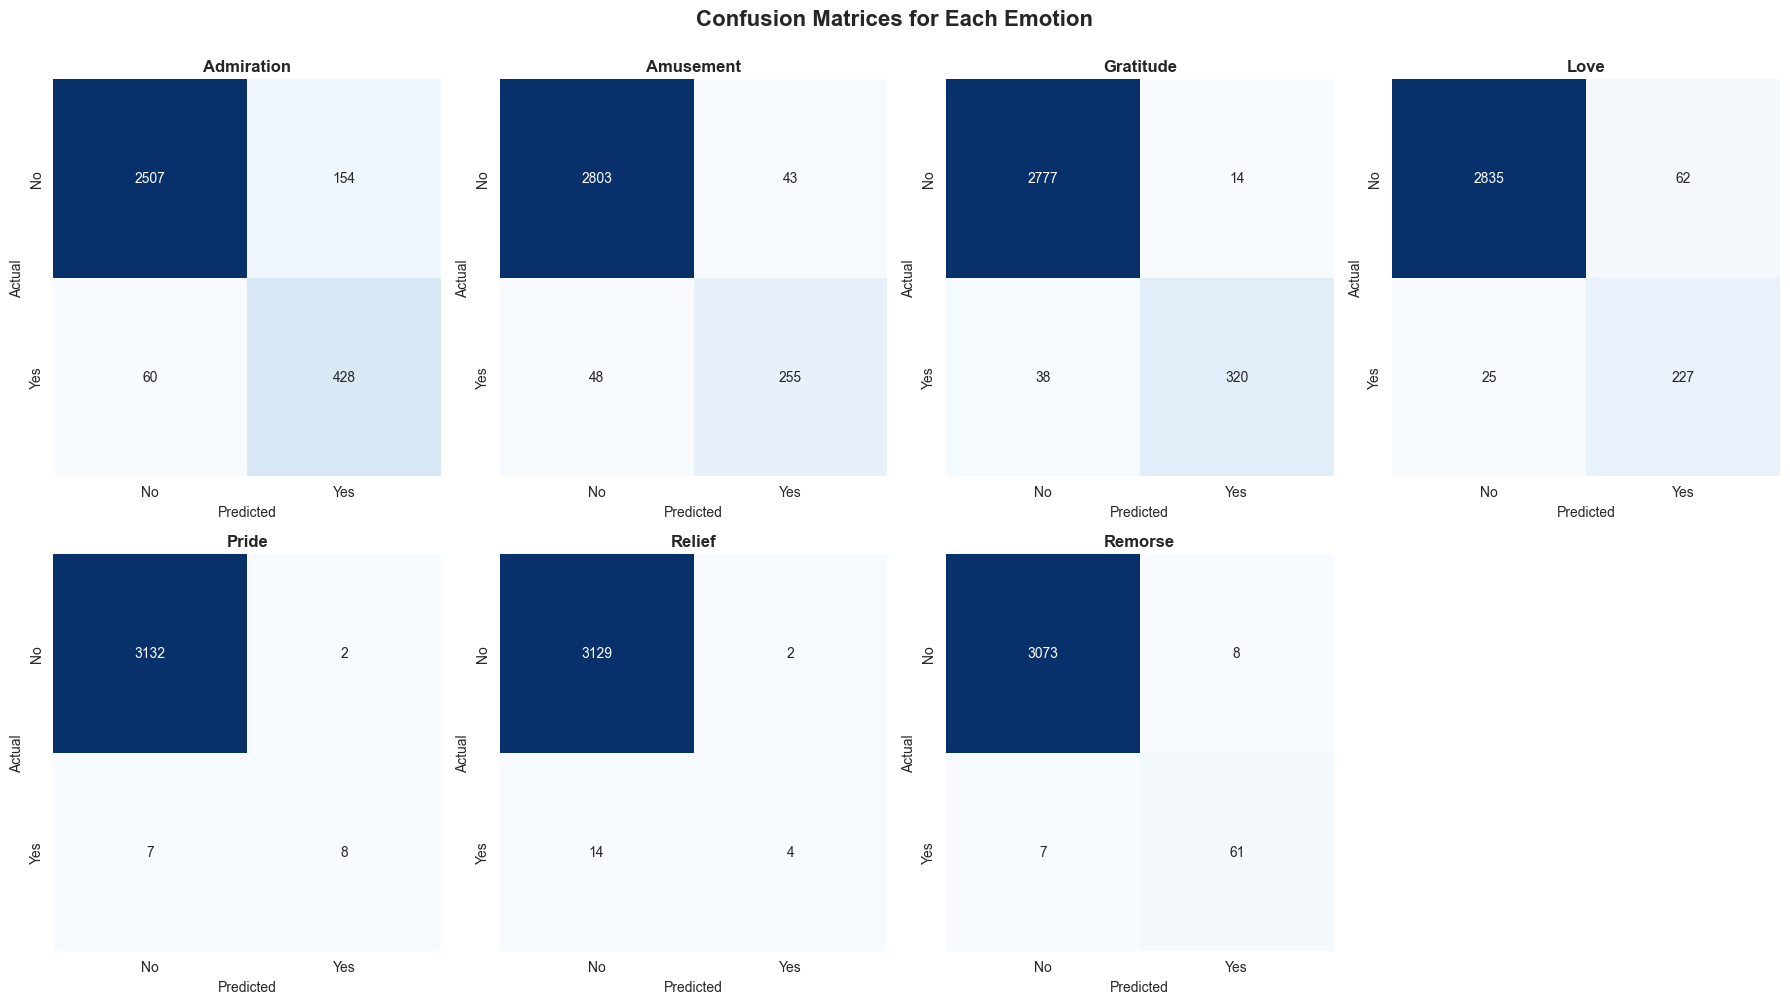

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, label in enumerate(LABELS):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                cbar=False)
    axes[i].set_title(f'{label. capitalize()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicted', fontsize=10)
    axes[i].set_ylabel('Actual', fontsize=10)

# Hide the last subplot if odd number of labels
if len(LABELS) < len(axes):
    axes[-1].axis('off')

plt.suptitle('Confusion Matrices for Each Emotion', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [25]:
comparison_df = pd.DataFrame({
    'text': texts,
})

# Add ground truth columns
for label in LABELS:
    comparison_df[f'true_{label}'] = y_true[:, LABELS.index(label)]
    comparison_df[f'pred_{label}'] = y_pred[:, LABELS.index(label)]
    comparison_df[f'prob_{label}'] = y_prob[:, LABELS.index(label)]

print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)
print(comparison_df.head(10))

# Cell 20: Analyze Prediction Errors
# Find samples with mismatches
comparison_df['exact_match'] = (y_true == y_pred).all(axis=1)
comparison_df['num_errors'] = (y_true != y_pred). sum(axis=1)

error_summary = comparison_df['num_errors'].value_counts().sort_index()
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)
print(f"Exact matches: {comparison_df['exact_match'].sum()} ({comparison_df['exact_match']. mean()*100:.2f}%)")
print(f"\nError distribution:")
print(error_summary)


SAMPLE PREDICTIONS
                                                text  true_admiration  \
0  Is this in New Orleans?? I really feel like th...                0   
1  You know the answer man, you are programmed to...                0   
2  The economy is heavily controlled and subsidiz...                0   
3  Thank you for your vote of confidence, but we ...                0   
4                                       There it is!                0   
5  It's better to say a moment like that could tr...                0   
6  Like this just cuz of the [NAME] rhymes backgr...                0   
7  Lol dream on buddy. You’ve had enough attentio...                0   
8  Did you hear the reason for this? Because they...                0   
9                 [NAME] is such a legendary daddy 😩                0   

   pred_admiration  prob_admiration  true_amusement  pred_amusement  \
0                0         0.010041               0               0   
1                0         0.01512

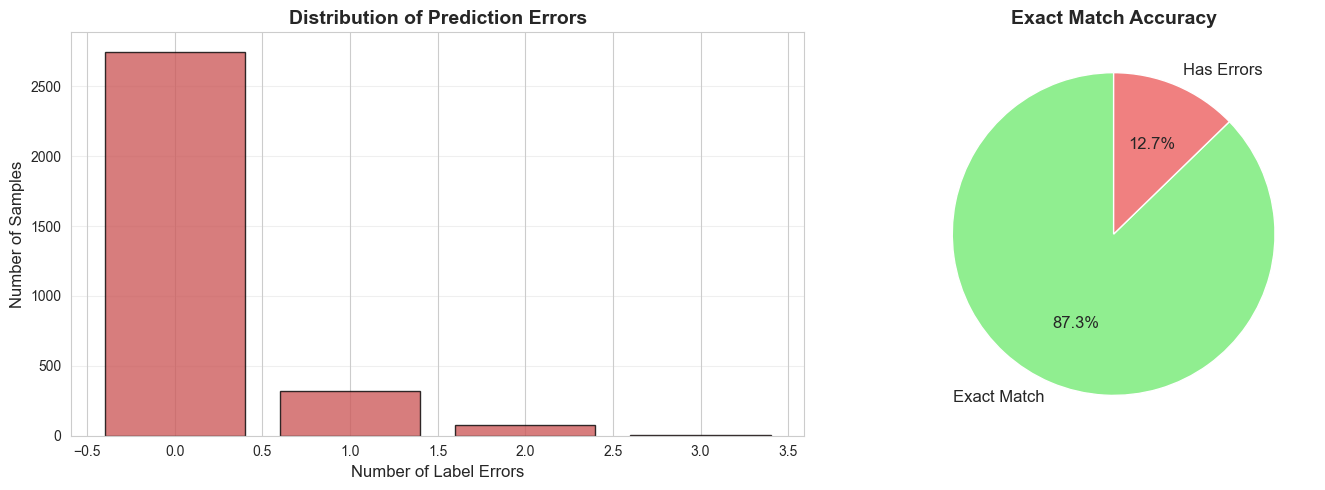

In [26]:
fig, axes = plt. subplots(1, 2, figsize=(15, 5))

# Error count distribution
axes[0].bar(error_summary.index, error_summary.values, color='indianred', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Number of Label Errors', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Accuracy pie chart
accuracy_data = [comparison_df['exact_match'].sum(), (~comparison_df['exact_match']).sum()]
axes[1]. pie(accuracy_data, labels=['Exact Match', 'Has Errors'], autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Exact Match Accuracy', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [27]:
print("\n" + "="*60)
print("EXAMPLES OF CORRECT PREDICTIONS")
print("="*60)
correct_samples = comparison_df[comparison_df['exact_match']].head(5)
for idx, row in correct_samples. iterrows():
    true_labels = [LABELS[i] for i in range(len(LABELS)) if y_true[idx, i] == 1]
    pred_labels = [LABELS[i] for i in range(len(LABELS)) if y_pred[idx, i] == 1]
    print(f"\nText: {row['text'][:100]}...")
    print(f"True: {true_labels}")
    print(f"Pred: {pred_labels}")

print("\n" + "="*60)
print("EXAMPLES OF INCORRECT PREDICTIONS")
print("="*60)
incorrect_samples = comparison_df[~comparison_df['exact_match']].head(5)
for idx, row in incorrect_samples.iterrows():
    true_labels = [LABELS[i] for i in range(len(LABELS)) if y_true[idx, i] == 1]
    pred_labels = [LABELS[i] for i in range(len(LABELS)) if y_pred[idx, i] == 1]
    print(f"\nText: {row['text'][:100]}...")
    print(f"True: {true_labels}")
    print(f"Pred: {pred_labels}")
    print(f"Errors: {row['num_errors']}")


EXAMPLES OF CORRECT PREDICTIONS

Text: Is this in New Orleans?? I really feel like this is New Orleans....
True: []
Pred: []

Text: You know the answer man, you are programmed to capture those codes they send you, don’t avoid them!...
True: []
Pred: []

Text: The economy is heavily controlled and subsidized by the government. In any case, I was poking at the...
True: []
Pred: []

Text: Thank you for your vote of confidence, but we statistically can't get to 10 wins....
True: ['gratitude']
Pred: ['gratitude']

Text: There it is!...
True: []
Pred: []

EXAMPLES OF INCORRECT PREDICTIONS

Text: [NAME] is such a legendary daddy 😩...
True: []
Pred: ['admiration']
Errors: 1

Text: Thank you. I really appreciate your response...
True: ['admiration', 'gratitude']
Pred: ['gratitude']
Errors: 1

Text: Your 'brother' had texted alot of girls and ended up on in Internet many times then, what a celebrit...
True: ['amusement']
Pred: []
Errors: 1

Text: Wow, out of all of that, only one person mention

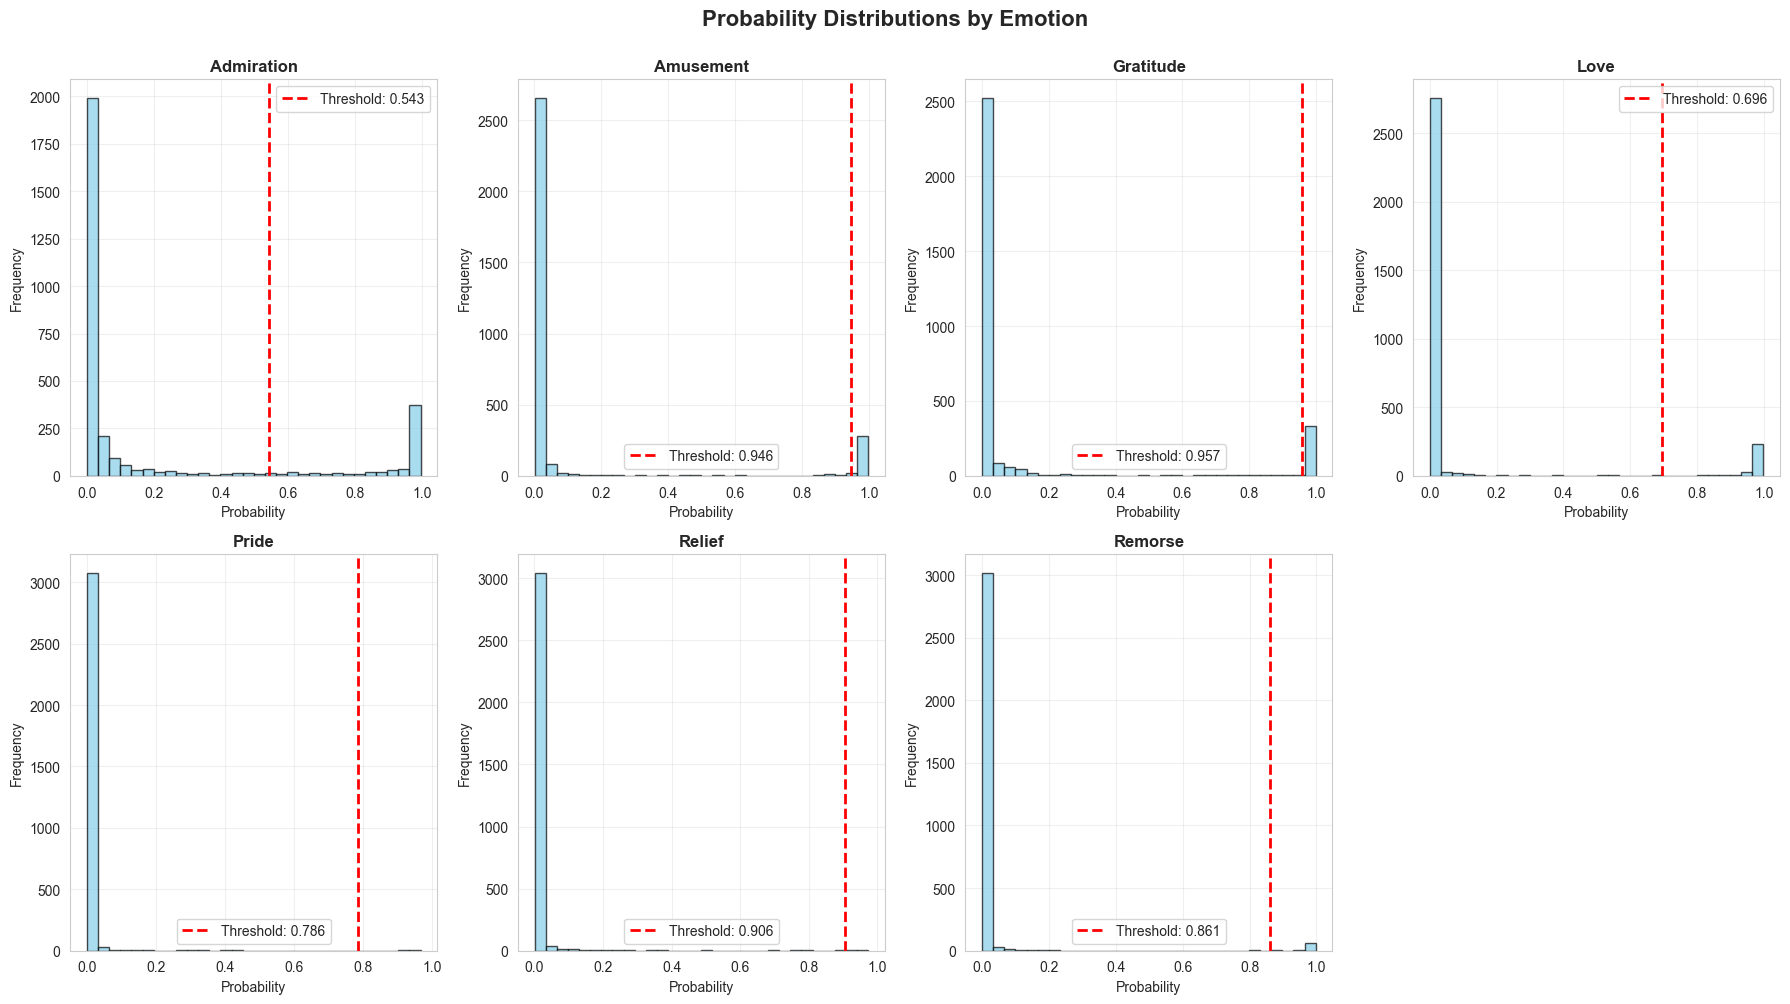

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, label in enumerate(LABELS):
    probs = y_prob[:, i]
    axes[i].hist(probs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(predictor.thresholds[label], color='red', linestyle='--', linewidth=2, label=f'Threshold: {predictor.thresholds[label]:.3f}')
    axes[i].set_xlabel('Probability', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'{label.capitalize()}', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

if len(LABELS) < len(axes):
    axes[-1]. axis('off')

plt.suptitle('Probability Distributions by Emotion', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Saving Results

In [29]:
output_dir = "benchmark_results_notebook"
os.makedirs(output_dir, exist_ok=True)

# Save predictions
comparison_df.to_csv(f"{output_dir}/predictions_comparison.csv", index=False)

# Save metrics
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv(f"{output_dir}/overall_metrics.csv", index=False)

per_label_df.to_csv(f"{output_dir}/per_label_metrics.csv")

print(f"\nResults saved to {output_dir}/")
print("Files created:")
print(f"  - predictions_comparison.csv")
print(f"  - overall_metrics.csv")
print(f"  - per_label_metrics.csv")


Results saved to benchmark_results_notebook/
Files created:
  - predictions_comparison.csv
  - overall_metrics.csv
  - per_label_metrics.csv


In [30]:
print("\n" + "="*70)
print(" "*20 + "FINAL SUMMARY REPORT")
print("="*70)
print(f"\nDataset: {DEFAULT_EVAL_PATH}")
print(f"Total Samples: {len(df)}")
print(f"Emotion Labels: {', '.join(LABELS)}")
print(f"\n{'Metric':<30} {'Value':>10}")
print("-"*42)
print(f"{'Subset Accuracy':<30} {metrics['subset_accuracy']:>10.4f}")
print(f"{'Hamming Loss':<30} {metrics['hamming_loss']:>10.4f}")
print(f"{'Jaccard Score':<30} {metrics['jaccard_score']:>10.4f}")
print(f"{'F1 (Micro)':<30} {metrics['f1_micro']:>10.4f}")
print(f"{'F1 (Macro)':<30} {metrics['f1_macro']:>10.4f}")
print(f"{'Precision (Micro)':<30} {metrics['precision_micro']:>10. 4f}")
print(f"{'Recall (Micro)':<30} {metrics['recall_micro']:>10.4f}")
print("\n" + "="*70)
print("Analysis Complete!")
print("="*70)


                    FINAL SUMMARY REPORT

Dataset: dev.csv
Total Samples: 3149
Emotion Labels: admiration, amusement, gratitude, love, pride, relief, remorse

Metric                              Value
------------------------------------------
Subset Accuracy                    0.8727
Hamming Loss                       0.0220
Jaccard Score                      0.3797
F1 (Micro)                         0.8434
F1 (Macro)                         0.7538


ValueError: Format specifier missing precision